<a href="https://colab.research.google.com/github/Riturajkumari/Ensemble_technique/blob/main/Ensemble_Techniques_And_Its_Types_Assig4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.**

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Ensamble/dataset.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
# Preprocess the dataset by handling missing values

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- No any missing values,encoding categorical variables in given the dataset 

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df['target'].unique()

array([1, 0])

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer ## HAndle Missing Values
from sklearn.preprocessing import StandardScaler ## Feature Scaling

In [12]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:

numerical_cols = ['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [14]:
## feature Engineering Automation
## Numerical Pipelines
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')), ##Missing Values
        ('scaler',StandardScaler()) ## feature Scaling
    ]

)

In [15]:
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols)])


**Q2. Split the dataset into a training set (70%) and a test set (30%).**

In [16]:
## independent and dependent feature
X=df.drop(labels=['target'],axis=1)
y=df.target

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [18]:
X_train.shape,X_test.shape

((212, 13), (91, 13))

In [19]:
y_train.shape,y_test.shape

((212,), (91,))

**Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.**

In [20]:
from sklearn.ensemble import RandomForestClassifier
# create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# predictin on the test set
y_pred = classifier.predict(X_test)

In [22]:
# Calculate Model Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8241758241758241


**Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.**

In [23]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8241758241758241


In [25]:
print("recall_score",recall_score(y_test,y_pred))

recall_score 0.86


In [26]:
print("f1_score",f1_score(y_test,y_pred))

f1_score 0.8431372549019608


In [27]:
print('precision_score',precision_score(y_test,y_pred))

precision_score 0.8269230769230769


**Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.**

In [28]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [47]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


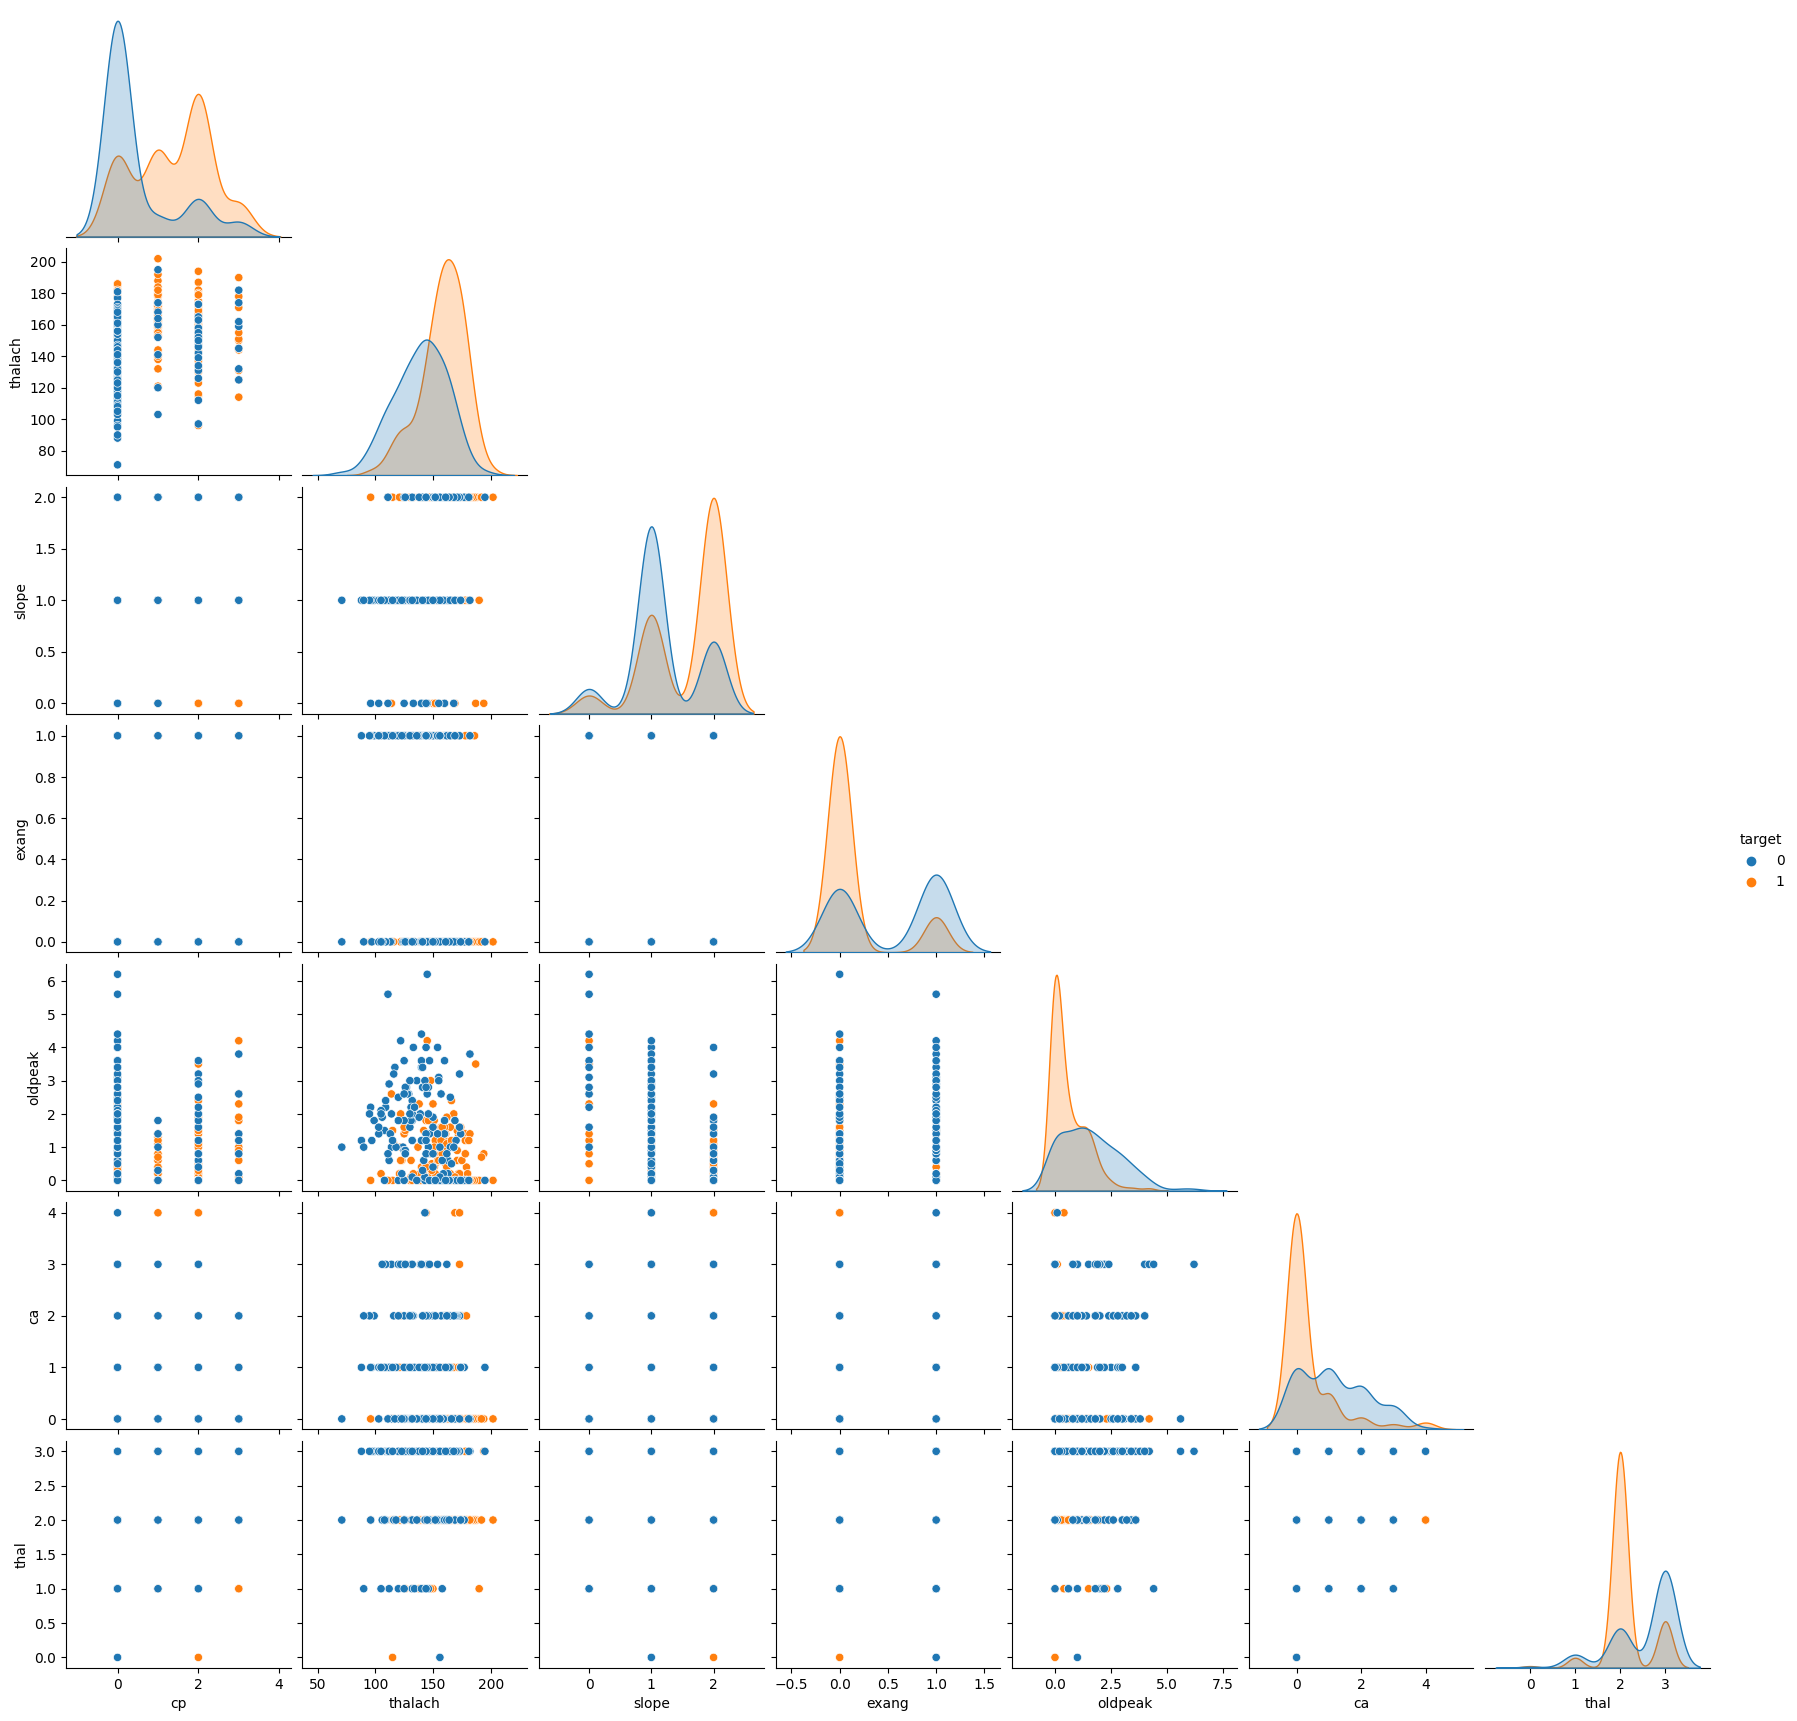

In [46]:
# pairplot only some interesting feature (high correlation positive and negative with target)
intr_col = ['cp','thalach','slope','exang','oldpeak','ca', 'thal', 'target']
sns.pairplot(df[intr_col], corner=True, hue='target')

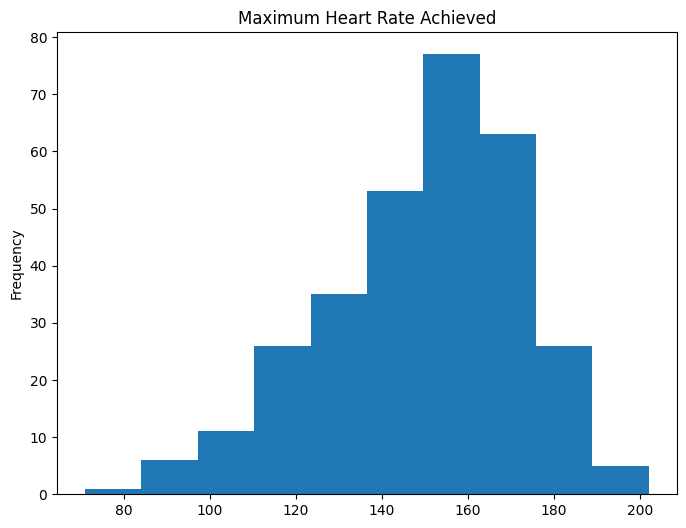

In [48]:
# Display maximum heart rate distribution
df['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

**Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.**

-  - “Max_depth”: This hyperparameter represents the maximum level of each tree in the random forest model. A deeper tree performs well and captures a lot of information about the training data, but will not generalize well to test data. By default, this value is set to “None” in the Scikit-Learn library, which means that the trees are left to expand completely.
-  “Max_features”: The maximum number of features that the random forest model is allowed to try at each split. By default in Scikit-Learn, this value is set to the square root of the total number of variables in the dataset.
- “N_estimators”: The number of decision trees in the forest. The default number of estimators in Scikit-Learn is 10.
-  “Min_samples_leaf”: The minimum number of samples required to be at the leaf node of each tree. The default value is 1 in Scikit-Learn.
- “Min_samples_split”: The minimum number of samples required to split an internal node of each tree. The default value is 2 in Scikit-Learn.


In [31]:
from sklearn.ensemble import RandomForestClassifier
## Model Training Automation
models= RandomForestClassifier()

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
 # Train model
 
 models.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

**Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.**

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [37]:
## Model Training Automation
models={
    'Random Forest':RandomForestClassifier(),
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier()

}

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)

            

        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction
       
        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score
            

            
    return report


In [44]:
evaluate_model(X_train,y_train,X_test,y_test,models)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Random Forest': 0.8021978021978022,
 'Logistic Regression': 0.8131868131868132,
 'Decision Tree': 0.7142857142857143}

In [42]:
classfier=RandomForestClassifier()

In [43]:
## Hypeparameter Tuning
params={'max_depth':[3,5,10,None],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy']
              }

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
cv=RandomizedSearchCV(classfier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=300;, score=0.860 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=300;, score=0.814 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=300;, score=0.714 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=300;, score=0.857 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=300;, score=0.762 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.860 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.860 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.738 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.857 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=10, n_estimators=200;, score=0.762 total time=   0.4s
[CV 1/5] 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

**Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.**

In [49]:
cv.best_params_

{'n_estimators': 300, 'max_depth': 3, 'criterion': 'entropy'}

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

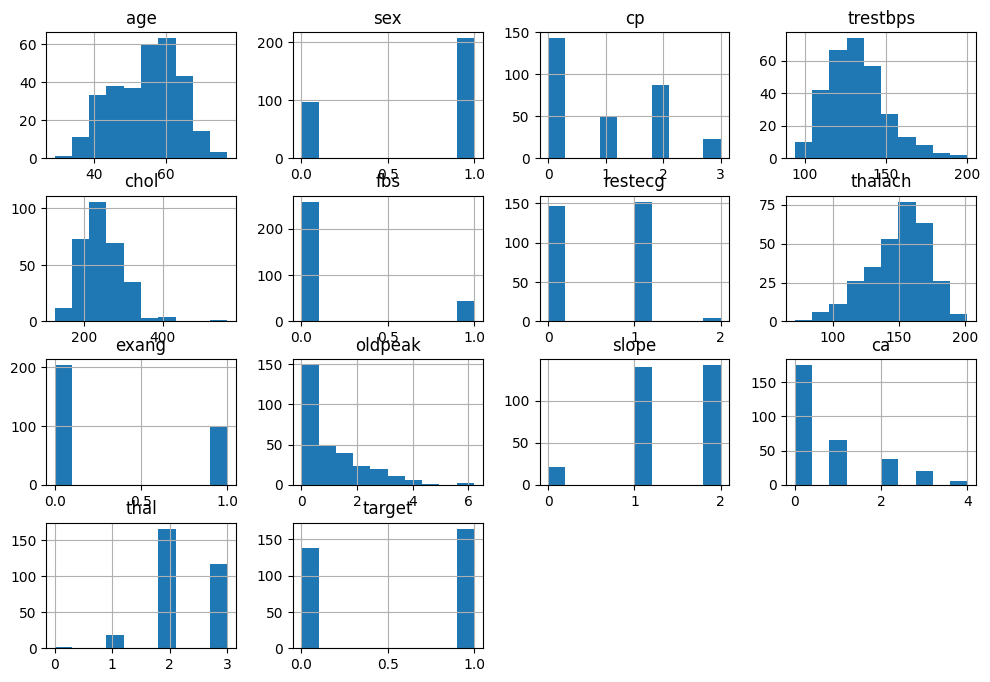

In [51]:
# data distribution of numerical values
df.hist(figsize=(12,8))